Ось **розгорнутий контент для файлу `06_plotting.ipynb`**, присвячений **візуалізації аналітичних даних військового характеру** за допомогою бібліотек `matplotlib` і `pandas`.

---

# 📘 `06_plotting.ipynb`

## **Тема: Побудова графіків у військовій аналітиці**

---

### 🔹 Вступ

Візуалізація — ключовий елемент аналітичного процесу у військових штабах. Графіки допомагають виявити динаміку втрат, ефективність дій, зміни у стані підрозділів та багато іншого.

---

## 🔸 1. Імпорт бібліотек

```python
import pandas as pd
import matplotlib.pyplot as plt
```

> **Підготуємо дані:**

```python
df = pd.read_csv("losses.csv", encoding="utf-8")
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
```

---

## 🔸 2. Лінійний графік втрат за днями

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника за датами")
plt.xlabel("Дата")
plt.ylabel("Кількість втрат")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

---

## 🔸 3. Стовпчиковий графік втрат за напрямками

```python
grouped = df.groupby("Напрямок")["Втрати"].sum()

grouped.plot(kind="bar")
plt.title("Сумарні втрати по напрямках")
plt.ylabel("Втрати")
plt.xlabel("Напрямок")
plt.grid(axis='y')
plt.show()
```

---

## 🔸 4. Кругова діаграма участі підрозділів

```python
unit_sum = df.groupby("Підрозділ")["Втрати"].sum()

unit_sum.plot(kind="pie", autopct="%1.1f%%")
plt.title("Участь підрозділів у бойових діях (за втратами)")
plt.ylabel("")
plt.show()
```

---

## 🔸 5. Побудова декількох графіків одночасно

```python
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("Напрямок")["Втрати"].sum().plot(kind="bar", ax=ax[0])
ax[0].set_title("Втрати по напрямках")

df.groupby("Підрозділ")["Втрати"].sum().plot(kind="bar", ax=ax[1])
ax[1].set_title("Втрати по підрозділах")

plt.tight_layout()
plt.show()
```

---

## 🔸 6. Збереження графіку у файл

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника")
plt.savefig("losses_plot.png", dpi=300)
```

---

## 📝 Практичні завдання:

1. Побудувати графік динаміки втрат по днях.
2. Створити стовпчикову діаграму сумарних втрат по напрямках.
3. Вивести кругову діаграму частки втрат підрозділів.
4. Побудувати два графіки на одному полотні: по напрямках і по підрозділах.
5. Зберегти один з графіків у формат `.png`.




## Задача 1

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     ---------- -------------------------- 30.7/108.7 kB 640.0 kB/s eta 0:00:01
     ----------------------------------- -- 102.4/108.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 108.7/108.7 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 8.3 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/8.1 MB 7.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.1 MB 9.4 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.1 MB 10.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.1 MB 10.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.1 MB 10.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.2 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\5103_1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


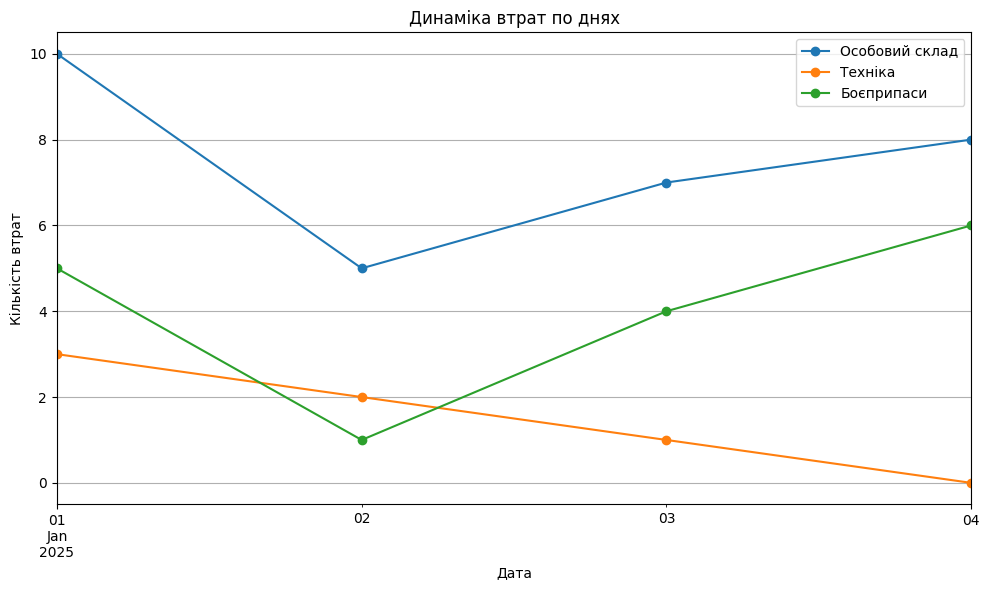

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')

df['Дата'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

df.set_index('Дата')[['Особовий склад', 'Техніка', 'Боєприпаси']].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Динаміка втрат по днях')
plt.xlabel('Дата')
plt.ylabel('Кількість втрат')
plt.grid(True)
plt.tight_layout()
plt.show()

## Задача 2

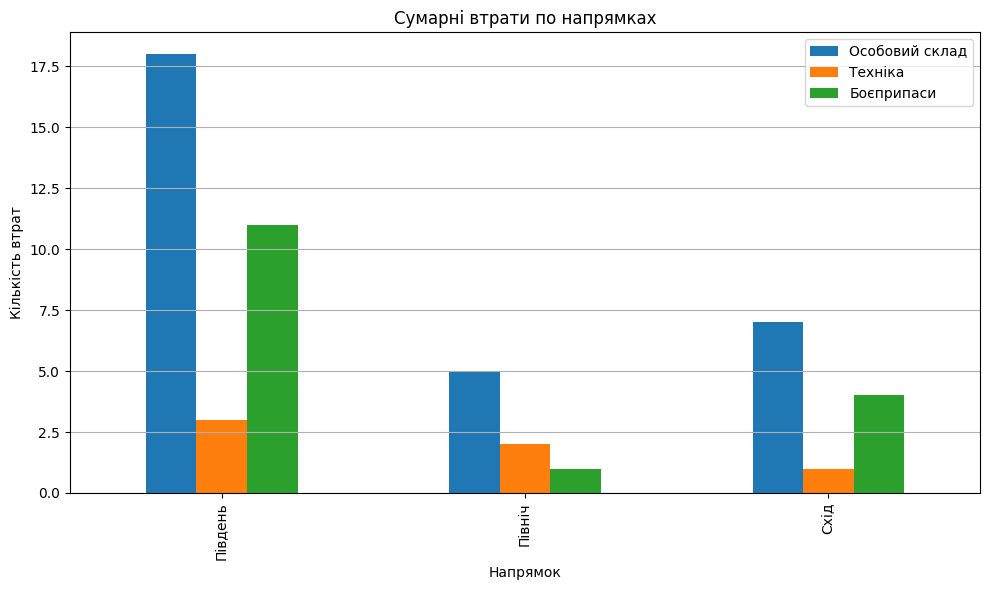

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')

summary = df.groupby('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()

summary.plot(kind='bar', figsize=(10, 6))
plt.title('Сумарні втрати по напрямках')
plt.xlabel('Напрямок')
plt.ylabel('Кількість втрат')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Задача 3

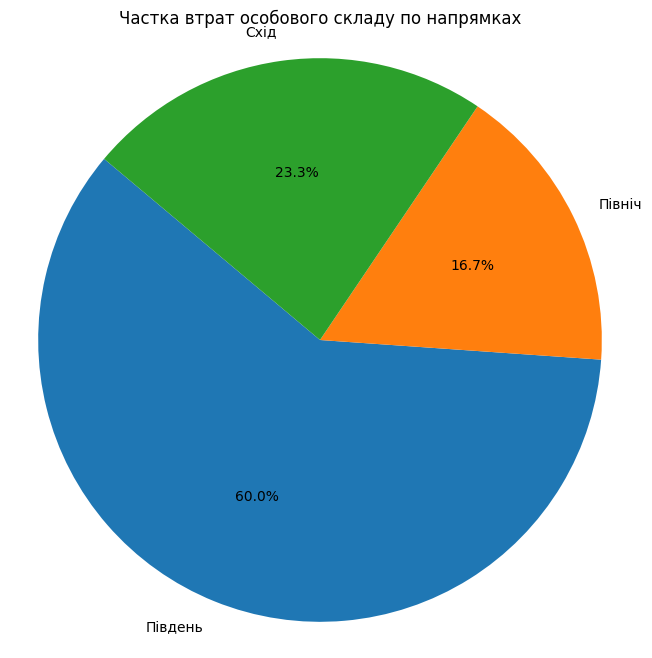

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')

personnel_losses = df.groupby('Напрямок')['Особовий склад'].sum()

plt.figure(figsize=(8, 8))
plt.pie(personnel_losses, labels=personnel_losses.index, autopct='%1.1f%%', startangle=140)
plt.title('Частка втрат особового складу по напрямках')
plt.axis('equal')  
plt.show()

## Задача 4

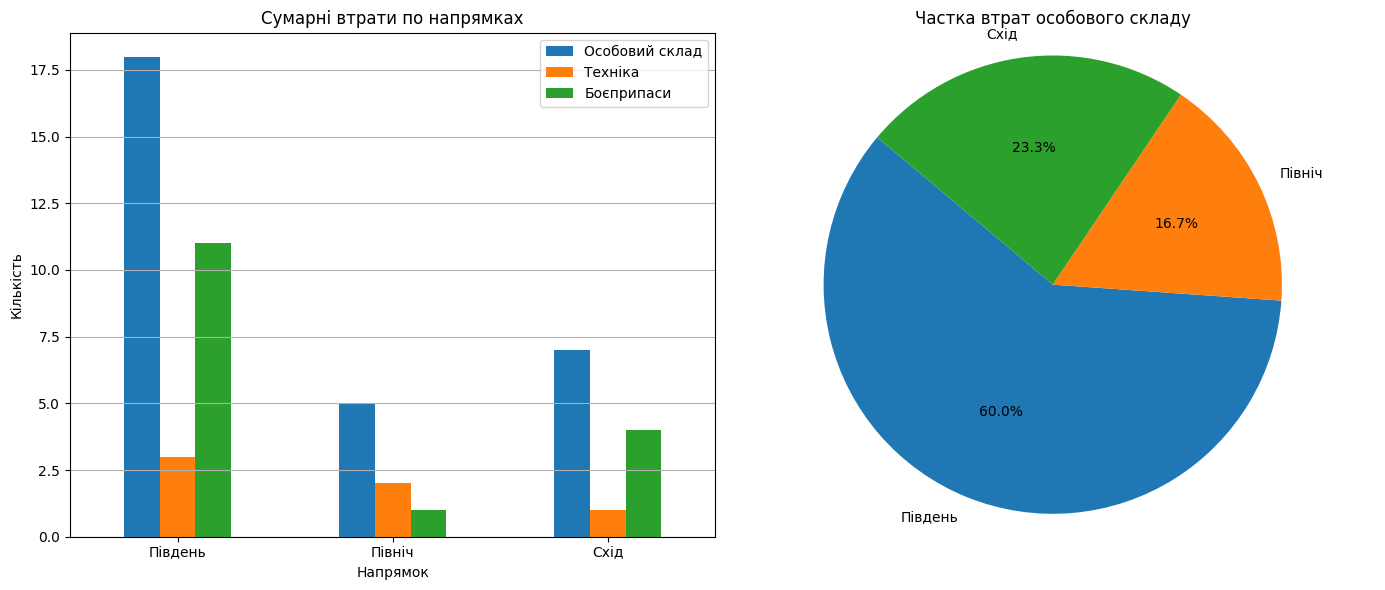

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')


summary = df.groupby('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()


personnel_losses = summary['Особовий склад']


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  


summary.plot(kind='bar', ax=axs[0])
axs[0].set_title('Сумарні втрати по напрямках')
axs[0].set_xlabel('Напрямок')
axs[0].set_ylabel('Кількість')
axs[0].grid(axis='y')
axs[0].legend(loc='upper right')
axs[0].tick_params(axis='x', rotation=0)

axs[1].pie(personnel_losses, labels=personnel_losses.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Частка втрат особового складу')
axs[1].axis('equal') 


plt.tight_layout()
plt.show()

## Задача 5

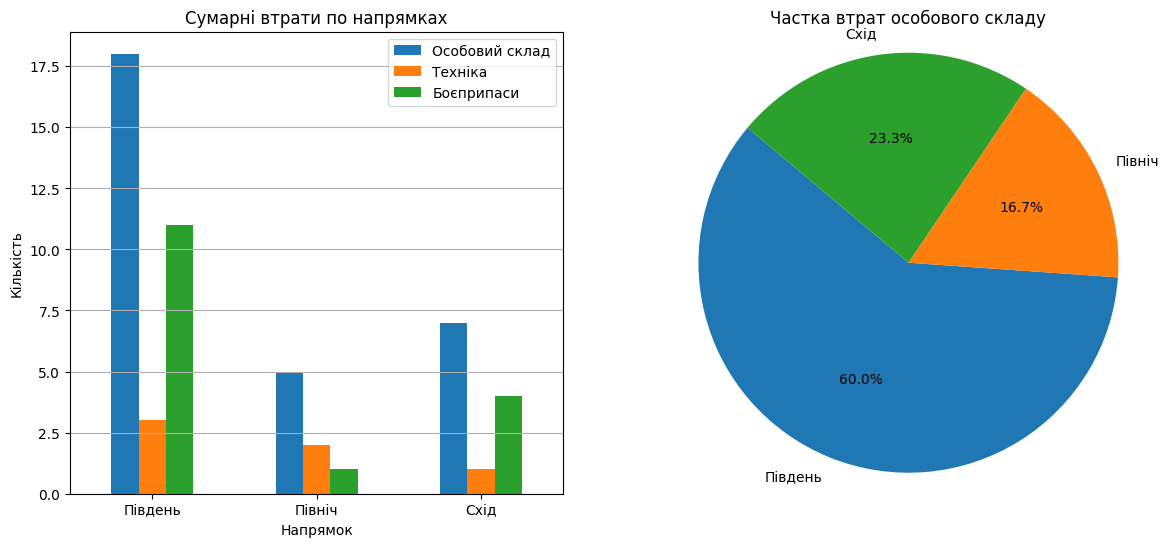

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')


summary = df.groupby('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()


personnel_losses = summary['Особовий склад']


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  


summary.plot(kind='bar', ax=axs[0])
axs[0].set_title('Сумарні втрати по напрямках')
axs[0].set_xlabel('Напрямок')
axs[0].set_ylabel('Кількість')
axs[0].grid(axis='y')
axs[0].legend(loc='upper right')
axs[0].tick_params(axis='x', rotation=0)

axs[1].pie(personnel_losses, labels=personnel_losses.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Частка втрат особового складу')
axs[1].axis('equal') 


plt.savefig(r'C:\Users\5103_1\Documents\5103-1\Sample1\graph.png', dpi=300)
plt.show()
